# Seminar - APIs, DBs and Live coding

In [1]:
import requests # for making HTTP requests
import pandas as pd # for dataframes
import time # for sleep
import re # regular expressions

Time package small things:

In [2]:
%%time
print("Hello, World!")

Hello, World!
CPU times: user 20 μs, sys: 2 μs, total: 22 μs
Wall time: 22.2 μs


In [3]:
t0 = time.time()
time.sleep(1)
t1 = time.time()
print("Time elapsed: ", t1-t0, " seconds")

Time elapsed:  1.0057621002197266  seconds


In [4]:
%%time 
time.sleep(2)

CPU times: user 1.22 ms, sys: 2.04 ms, total: 3.26 ms
Wall time: 2 s


In [5]:
import random

In [6]:
%%time
r_time = random.uniform(0.5, 1.2)
print("Sleeping for ", r_time, " seconds")
time.sleep(r_time)

Sleeping for  0.9739446227901105  seconds
CPU times: user 1.79 ms, sys: 1.74 ms, total: 3.52 ms
Wall time: 976 ms


## Task 1: Requesting API

Let us work with data of sreality.cz which we can access via their api. An intuition is that the api is limited for a number of requests (but not verified).

### 1a. Create a function requesting data from sreality

```python
base_url = 'https://www.sreality.cz/api/cs/v2/estates?category_main_cb=1&category_type_cb=1&locality_region_id=10&per_page60&page={}'.format(i)

r = requests.get(base_url)
d = r.json()
```

0) function should parametrize: 
    * `category_main_cb` - `{'flat':1, 'house':2, 'land':3 }`
    * `category_type_cb` - `{'sell':1,'rent':2}`
    * `locality_region_id` - use 10 as default value
    * `page` parameter
1) use string inputs for `category_main_cb` and `category_type_cb`
2) include `try/except` clause to handle errors
3) function should return JSON data in python types
4) do not forget to sleep each request at least 0.5s

In [7]:
def request_sreality(page, category_main_str, category_type_str, locality_region_id=10):
    """
    Request data from sreality.cz API
    :param page: page number
    :param category_main_str: category of the property
    :param category_type_str: type of the offer
    :param locality_region_id: region id
    :return json: json response
    """
    category_mains = {'flat':1, 'house':2, 'land':3 }
    category_types = {'sell':1, 'rent':2}
    template_url = 'https://www.sreality.cz/api/cs/v2/estates?category_main_cb={category_main}&category_type_cb={category_type}&locality_region_id={locality_region_id}&per_page60&page={page}'
    request_url = template_url.format(
        category_main=category_mains[category_main_str],
        category_type=category_types[category_type_str],
        locality_region_id=locality_region_id,
        page=page
    )
    # sleep for random time
    r_sleep = random.uniform(0.5, 1.2)
    time.sleep(r_sleep)
    # make request with try-except block
    try:
        r = requests.get(request_url)
    except requests.exceptions.RequestException as e:
        print(e)
        return None
    
    return r.json() # return json response

d = request_sreality(0, 'flat', 'sell', 10)

Inspect the element `d`:

In [8]:
d.keys()

dict_keys(['meta_description', 'result_size', '_embedded', 'filterLabels', 'title', 'filter', '_links', 'locality', 'locality_dativ', 'logged_in', 'per_page', 'category_instrumental', 'page', 'filterLabels2'])

In [9]:
d['meta_description']

'4560 realit v nabídce prodej bytů Praha. Vyberte si novou nemovitost na sreality.cz s hledáním na mapě a velkými náhledy fotografií nabízených bytů.'

In [10]:
d['result_size']

4560

In [11]:
d['_embedded'].keys()

dict_keys(['estates', 'is_saved', 'not_precise_location_count'])

In [12]:
d['_embedded']['is_saved']

{'email_notification': False,
 'notification_advert_count': 0,
 'stack_id': 0,
 'push_notification': False,
 '_links': {'self': {'href': '/cs/v2/stacks'}},
 'removed': False,
 'saved': False}

In [13]:
d['_embedded']['estates'][0] # first estate - unlisted

{'labelsReleased': [['new_building', 'balcony', 'garage'], []],
 'has_panorama': 0,
 'labels': ['Novostavba', 'Balkon', 'Garáž'],
 'is_auction': False,
 'labelsAll': [['new_building',
   'personal',
   'balcony',
   'cellar',
   'elevator',
   'garage',
   'not_furnished'],
  ['candy_shop',
   'small_shop',
   'theater',
   'vet',
   'tavern',
   'movies',
   'playground',
   'sightseeing',
   'sports',
   'school',
   'shop',
   'drugstore',
   'post_office',
   'train',
   'atm',
   'tram',
   'metro',
   'kindergarten',
   'medic',
   'bus_public_transport',
   'restaurant']],
 'seo': {'category_main_cb': 1,
  'category_sub_cb': 6,
  'category_type_cb': 1,
  'locality': 'praha-zizkov-seifertova'},
 'exclusively_at_rk': 0,
 'category': 1,
 'has_floor_plan': 1,
 '_embedded': {'favourite': {'is_favourite': False,
   '_links': {'self': {'profile': '/favourite/doc',
     'href': '/cs/v2/favourite/3795186252',
     'title': 'Oblibene inzeraty'}}},
  'note': {'note': '',
   '_links': {'sel

### 1b. Create a function converting sreality json data into pandas dataframe

In [14]:
len(d['_embedded']['estates']) # number of estates

21

In [15]:
d['_embedded']['estates'][4]

{'labelsReleased': [['terrace', 'panel', 'partly_furnished'], []],
 'has_panorama': 0,
 'labels': ['Terasa', 'Panelová', 'Částečně vybavený'],
 'is_auction': False,
 'labelsAll': [['personal',
   'terrace',
   'panel',
   'elevator',
   'partly_furnished'],
  ['small_shop',
   'candy_shop',
   'tavern',
   'vet',
   'theater',
   'playground',
   'movies',
   'atm',
   'post_office',
   'sports',
   'train',
   'school',
   'metro',
   'restaurant',
   'kindergarten',
   'bus_public_transport',
   'shop',
   'tram',
   'medic',
   'drugstore']],
 'seo': {'category_main_cb': 1,
  'category_sub_cb': 6,
  'category_type_cb': 1,
  'locality': 'praha-letnany-kuzelova'},
 'exclusively_at_rk': 1,
 'category': 1,
 'has_floor_plan': 1,
 '_embedded': {'favourite': {'is_favourite': False,
   '_links': {'self': {'profile': '/favourite/doc',
     'href': '/cs/v2/favourite/1072226892',
     'title': 'Oblibene inzeraty'}}},
  'note': {'note': '',
   '_links': {'self': {'profile': '/note/doc',
     'h

In [16]:
def convert_sreality_data_to_df(sreality_data):
    # return pd.json_normalize(sreality_data['_embedded']['estates'])
    return pd.DataFrame(sreality_data['_embedded']['estates'])

raw = convert_sreality_data_to_df(d)

In [17]:
raw.head()

,labelsReleased,has_panorama,labels,is_auction,labelsAll,seo,exclusively_at_rk,category,has_floor_plan,_embedded,...,hash_id,attractive_offer,price,price_czk,_links,rus,name,region_tip,gps,has_matterport_url
0,"[[new_building, balcony, garage], []]",0,"[Novostavba, Balkon, Garáž]",False,"[[new_building, personal, balcony, cellar, ele...","{'category_main_cb': 1, 'category_sub_cb': 6, ...",0,1,1,"{'favourite': {'is_favourite': False, '_links'...",...,3795186252,0,17438000,"{'value_raw': 17438000, 'unit': '', 'name': 'C...",{'dynamicDown': [{'href': 'https://d18-a.sdn.c...,False,Prodej bytu 3+kk 79 m²,3061817,"{'lat': 50.07259935872393, 'lon': 14.457448641...",False
1,"[[new_building, balcony, parking_lots], [shop]]",0,"[Novostavba, Balkon, Parkování, Obchod 7 min. ...",False,"[[new_building, personal, balcony, cellar, ele...","{'category_main_cb': 1, 'category_sub_cb': 4, ...",1,1,1,"{'favourite': {'is_favourite': False, '_links'...",...,3013616972,0,8137000,"{'value_raw': 8137000, 'unit': '', 'name': 'Ce...",{'dynamicDown': [{'href': 'https://d18-a.sdn.c...,False,Prodej bytu 2+kk 58 m²,0,"{'lat': 50.146005358723926, 'lon': 14.53084964...",False
2,"[[new_building, terrace, garage], []]",1,"[Novostavba, Terasa, Garáž]",False,"[[new_building, personal, terrace, brick, cell...","{'category_main_cb': 1, 'category_sub_cb': 8, ...",0,1,0,"{'favourite': {'is_favourite': False, '_links'...",...,1361764940,0,18693000,"{'value_raw': 18693000, 'unit': '', 'name': 'C...",{'dynamicDown': [{'href': 'https://d18-a.sdn.c...,False,Prodej bytu 4+kk 147 m²,0,"{'lat': 50.07610835872392, 'lon': 14.491145641...",False
3,"[[], []]",0,[],False,"[[personal, brick, cellar], [theater, small_sh...","{'category_main_cb': 1, 'category_sub_cb': 2, ...",1,1,1,"{'favourite': {'is_favourite': False, '_links'...",...,972485196,0,7353000,"{'value_raw': 7353000, 'unit': '', 'name': 'Ce...",{'dynamicDown': [{'href': 'https://d18-a.sdn.c...,False,Prodej bytu 1+kk 42 m²,0,"{'lat': 50.092435358723925, 'lon': 14.46550564...",True
4,"[[terrace, panel, partly_furnished], []]",0,"[Terasa, Panelová, Částečně vybavený]",False,"[[personal, terrace, panel, elevator, partly_f...","{'category_main_cb': 1, 'category_sub_cb': 6, ...",1,1,1,"{'favourite': {'is_favourite': False, '_links'...",...,1072226892,0,10509000,"{'value_raw': 10509000, 'unit': '', 'name': 'C...",{'dynamicDown': [{'href': 'https://d18-a.sdn.c...,False,Prodej bytu 3+kk 87 m² (Mezonet),0,"{'lat': 50.12948735872392, 'lon': 14.522203641...",True


### 1c. link function `1b` into function `1a`

In [18]:
df = convert_sreality_data_to_df(request_sreality(0, 'flat', 'sell', 10))
df.head()

,labelsReleased,has_panorama,labels,is_auction,labelsAll,seo,exclusively_at_rk,category,has_floor_plan,_embedded,...,hash_id,attractive_offer,price,price_czk,_links,rus,name,region_tip,gps,has_matterport_url
0,"[[new_building, balcony, garage], []]",0,"[Novostavba, Balkon, Garáž]",False,"[[new_building, personal, balcony, cellar, ele...","{'category_main_cb': 1, 'category_sub_cb': 4, ...",0,1,1,"{'favourite': {'is_favourite': False, '_links'...",...,1168372300,0,13859000,"{'value_raw': 13859000, 'unit': '', 'name': 'C...",{'dynamicDown': [{'href': 'https://d18-a.sdn.c...,False,Prodej bytu 2+kk 73 m²,3061814,"{'lat': 50.072839358723925, 'lon': 14.45760464...",False
1,"[[], []]",0,[],False,"[[personal, brick, cellar], [theater, small_sh...","{'category_main_cb': 1, 'category_sub_cb': 2, ...",1,1,1,"{'favourite': {'is_favourite': False, '_links'...",...,972485196,0,7353000,"{'value_raw': 7353000, 'unit': '', 'name': 'Ce...",{'dynamicDown': [{'href': 'https://d18-a.sdn.c...,False,Prodej bytu 1+kk 42 m²,0,"{'lat': 50.092435358723925, 'lon': 14.46550564...",True
2,"[[terrace, panel], []]",0,"[Terasa, Panelová]",False,"[[personal, terrace, panel, elevator, partly_f...","{'category_main_cb': 1, 'category_sub_cb': 6, ...",1,1,1,"{'favourite': {'is_favourite': False, '_links'...",...,1072226892,0,10509000,"{'value_raw': 10509000, 'unit': '', 'name': 'C...",{'dynamicDown': [{'href': 'https://d18-a.sdn.c...,False,Prodej bytu 3+kk 87 m² (Mezonet),0,"{'lat': 50.12948735872392, 'lon': 14.522203641...",True
3,"[[terrace, garage], []]",0,"[Terasa, Garáž]",False,"[[personal, terrace, brick, cellar, elevator, ...","{'category_main_cb': 1, 'category_sub_cb': 6, ...",1,1,0,"{'favourite': {'is_favourite': False, '_links'...",...,2620645964,0,14017000,"{'value_raw': 14017000, 'unit': '', 'name': 'C...",{'dynamicDown': [{'href': 'https://d18-a.sdn.c...,False,Prodej bytu 3+kk 139 m²,0,"{'lat': 50.02774235872393, 'lon': 14.333794641...",True
4,"[[], [metro, post_office]]",0,"[Metro 6 min. pěšky, Pošta 8 min. pěšky]",False,"[[personal, brick, cellar, elevator], [small_s...","{'category_main_cb': 1, 'category_sub_cb': 8, ...",0,1,1,"{'favourite': {'is_favourite': False, '_links'...",...,1605411404,0,15069000,"{'value_raw': 15069000, 'unit': '', 'name': 'C...",{'dynamicDown': [{'href': 'https://d18-a.sdn.c...,False,Prodej bytu 4+kk 154 m²,0,"{'lat': 50.088548358723926, 'lon': 14.48327364...",False


In [19]:
df.shape

(21, 27)

### 1c. Combining multiple requests into single df

* Function should parametrize:
    * `start_page` and `end_page`
    * request parameters
* construct a list of individual request dfs
* then feed it into `pd.concat` function

In [20]:
raw.shape

(21, 27)

In [21]:
request_sreality

<function __main__.request_sreality(page, category_main_str, category_type_str, locality_region_id=10)>

In [22]:
def request_multiply_sreality(start_page, end_page, category_main_str, category_type_str, locality_region_id=10):
    pages_to_request = range(start_page, end_page+1)
    list_of_dfs = []
    for page in pages_to_request:
        json_data = request_sreality(page, category_main_str, category_type_str, locality_region_id)
        if json_data is None:
            continue
        df = convert_sreality_data_to_df(json_data)
        list_of_dfs.append(df)
    
    return pd.concat(list_of_dfs)

df = request_multiply_sreality(1, 5, 'flat', 'sell', 10)
df.shape

(105, 27)

In [23]:
df.shape

(105, 27)

In [24]:
df.head()

,labelsReleased,has_panorama,labels,is_auction,labelsAll,seo,exclusively_at_rk,category,has_floor_plan,_embedded,...,hash_id,attractive_offer,price,price_czk,_links,rus,name,region_tip,gps,has_matterport_url
0,"[[new_building, balcony, garage], []]",0,"[Novostavba, Balkon, Garáž]",False,"[[new_building, personal, balcony, cellar, ele...","{'category_main_cb': 1, 'category_sub_cb': 4, ...",0,1,1,"{'favourite': {'is_favourite': False, '_links'...",...,1168372300,0,13859000,"{'value_raw': 13859000, 'unit': '', 'name': 'C...",{'dynamicDown': [{'href': 'https://d18-a.sdn.c...,False,Prodej bytu 2+kk 73 m²,3061814,"{'lat': 50.072839358723925, 'lon': 14.45760464...",False
1,"[[new_building, balcony, parking_lots], [shop]]",0,"[Novostavba, Balkon, Parkování, Obchod 7 min. ...",False,"[[new_building, personal, balcony, cellar, ele...","{'category_main_cb': 1, 'category_sub_cb': 4, ...",1,1,1,"{'favourite': {'is_favourite': False, '_links'...",...,3013616972,0,8137000,"{'value_raw': 8137000, 'unit': '', 'name': 'Ce...",{'dynamicDown': [{'href': 'https://d18-a.sdn.c...,False,Prodej bytu 2+kk 58 m²,0,"{'lat': 50.146005358723926, 'lon': 14.53084964...",False
2,"[[new_building, terrace, garage], []]",1,"[Novostavba, Terasa, Garáž]",False,"[[new_building, personal, terrace, brick, cell...","{'category_main_cb': 1, 'category_sub_cb': 8, ...",0,1,0,"{'favourite': {'is_favourite': False, '_links'...",...,1361764940,0,18693000,"{'value_raw': 18693000, 'unit': '', 'name': 'C...",{'dynamicDown': [{'href': 'https://d18-a.sdn.c...,False,Prodej bytu 4+kk 147 m²,0,"{'lat': 50.07610835872392, 'lon': 14.491145641...",False
3,"[[], []]",0,[],False,"[[personal, brick, cellar], [theater, small_sh...","{'category_main_cb': 1, 'category_sub_cb': 2, ...",1,1,1,"{'favourite': {'is_favourite': False, '_links'...",...,972485196,0,7353000,"{'value_raw': 7353000, 'unit': '', 'name': 'Ce...",{'dynamicDown': [{'href': 'https://d18-a.sdn.c...,False,Prodej bytu 1+kk 42 m²,0,"{'lat': 50.092435358723925, 'lon': 14.46550564...",True
4,"[[terrace, panel, partly_furnished], []]",0,"[Terasa, Panelová, Částečně vybavený]",False,"[[personal, terrace, panel, elevator, partly_f...","{'category_main_cb': 1, 'category_sub_cb': 6, ...",1,1,1,"{'favourite': {'is_favourite': False, '_links'...",...,1072226892,0,10509000,"{'value_raw': 10509000, 'unit': '', 'name': 'C...",{'dynamicDown': [{'href': 'https://d18-a.sdn.c...,False,Prodej bytu 3+kk 87 m² (Mezonet),0,"{'lat': 50.12948735872392, 'lon': 14.522203641...",True


In [25]:
df.tail()

,labelsReleased,has_panorama,labels,is_auction,labelsAll,seo,exclusively_at_rk,category,has_floor_plan,_embedded,...,hash_id,attractive_offer,price,price_czk,_links,rus,name,region_tip,gps,has_matterport_url
16,"[[panel], [drugstore]]",0,"[Panelová, Lékárna 7 min. pěšky]",False,"[[personal, loggia, panel, cellar, elevator], ...","{'category_main_cb': 1, 'category_sub_cb': 5, ...",0,1,0,"{'favourite': {'is_favourite': False, '_links'...",...,358827340,0,7657000,"{'value_raw': 7657000, 'unit': '', 'name': 'Ce...",{'dynamicDown': [{'href': 'https://d18-a.sdn.c...,False,Prodej bytu 2+1 71 m²,0,"{'lat': 50.003202358723925, 'lon': 14.45327664...",False
17,"[[terrace, parking_lots, furnished], [metro]]",0,"[Terasa, Parkování, Vybavený, Metro 5 min. pěšky]",False,"[[personal, terrace, brick, cellar, elevator, ...","{'category_main_cb': 1, 'category_sub_cb': 8, ...",0,1,1,"{'favourite': {'is_favourite': False, '_links'...",...,1483592268,0,22095000,"{'value_raw': 22095000, 'unit': '', 'name': 'C...",{'dynamicDown': [{'href': 'https://d18-a.sdn.c...,False,Prodej bytu 4+kk 151 m²,0,"{'lat': 50.03746535872393, 'lon': 14.328411641...",False
18,"[[garage], [medic, drugstore]]",0,"[Garáž, Lékař 7 min. pěšky, Lékárna 6 min. pěšky]",False,"[[personal, brick, cellar, elevator, garage, p...","{'category_main_cb': 1, 'category_sub_cb': 6, ...",1,1,0,"{'favourite': {'is_favourite': False, '_links'...",...,306438732,0,12216000,"{'value_raw': 12216000, 'unit': '', 'name': 'C...",{'dynamicDown': [{'href': 'https://d18-a.sdn.c...,False,Prodej bytu 3+kk 86 m²,0,"{'lat': 50.055413358723925, 'lon': 14.38139264...",False
19,"[[new_building, garage], []]",0,"[Novostavba, Garáž]",False,"[[new_building, personal, loggia, brick, eleva...","{'category_main_cb': 1, 'category_sub_cb': 4, ...",0,1,1,"{'favourite': {'is_favourite': False, '_links'...",...,2490868300,0,9882000,"{'value_raw': 9882000, 'unit': '', 'name': 'Ce...",{'dynamicDown': [{'href': 'https://d18-a.sdn.c...,False,Prodej bytu 2+kk 68 m²,0,"{'lat': 50.10264735872392, 'lon': 14.519361641...",False
20,"[[], [tram, medic]]",0,"[Tramvaj 1 min. pěšky, Lékař 4 min. pěšky]",False,"[[personal, brick, cellar], [small_shop, candy...","{'category_main_cb': 1, 'category_sub_cb': 6, ...",0,1,0,"{'favourite': {'is_favourite': False, '_links'...",...,346001996,0,17759000,"{'value_raw': 17759000, 'unit': '', 'name': 'C...",{'dynamicDown': [{'href': 'https://d18-a.sdn.c...,False,Prodej bytu 3+kk 91 m²,0,"{'lat': 50.066197358723926, 'lon': 14.47703264...",False


In [26]:
df.reset_index(drop=True, inplace=True)

In [27]:
df.index

RangeIndex(start=0, stop=105, step=1)

## Task 2: Cleaning data

### 2a. Filter columns
* filter only columns: `['locality', 'price', 'name', 'gps','hash_id','exclusively_at_rk']`
* use `.copy()` to avoid `SettingWithCopyWarning` later


In [28]:
slice?

Init signature: slice(self, /, *args, **kwargs)
Docstring:     
slice(stop)
slice(start, stop[, step])

Create a slice object.  This is used for extended slicing (e.g. a[0:10:2]).
Type:           type
Subclasses:     

In [29]:
df.columns

Index(['labelsReleased', 'has_panorama', 'labels', 'is_auction', 'labelsAll',
       'seo', 'exclusively_at_rk', 'category', 'has_floor_plan', '_embedded',
       'paid_logo', 'locality', 'has_video', 'advert_images_count', 'new',
       'auctionPrice', 'type', 'hash_id', 'attractive_offer', 'price',
       'price_czk', '_links', 'rus', 'name', 'region_tip', 'gps',
       'has_matterport_url'],
      dtype='object')

Copy selection into new one

In [30]:
df_clean = df[['locality', 'price', 'name', 'gps', 'hash_id', 'exclusively_at_rk']].copy()

### 2b: GPS
* Convert dictionary in `gps` column into two columns - `lat` and `lon`
* use apply function on gps column
* Note apply can return multiple columns

In [31]:
df_clean.loc[1:2, 'gps']

1    {'lat': 50.146005358723926, 'lon': 14.53084964...
2    {'lat': 50.07610835872392, 'lon': 14.491145641...
Name: gps, dtype: object

In [32]:
df_clean[['lat', 'lon']] = df_clean.gps.apply(lambda x: pd.Series({'lat': x['lat'], 'lon': x['lon']}))

In [33]:
df_clean.head()

,locality,price,name,gps,hash_id,exclusively_at_rk,lat,lon
0,Praha 3 - Žižkov,13859000,Prodej bytu 2+kk 73 m²,"{'lat': 50.072839358723925, 'lon': 14.45760464...",1168372300,0,50.072839,14.457605
1,Praha 9 - Čakovice,8137000,Prodej bytu 2+kk 58 m²,"{'lat': 50.146005358723926, 'lon': 14.53084964...",3013616972,1,50.146005,14.530850
2,Praha 3 - Žižkov,18693000,Prodej bytu 4+kk 147 m²,"{'lat': 50.07610835872392, 'lon': 14.491145641...",1361764940,0,50.076108,14.491146
3,Praha 7 - Holešovice,7353000,Prodej bytu 1+kk 42 m²,"{'lat': 50.092435358723925, 'lon': 14.46550564...",972485196,1,50.092435,14.465506
4,Praha 9 - Letňany,10509000,Prodej bytu 3+kk 87 m² (Mezonet),"{'lat': 50.12948735872392, 'lon': 14.522203641...",1072226892,1,50.129487,14.522204


### 2c. Get flat type from name

* Name is always represented by string `Prodej bytu [type of flat] [Area] m^2`
* Try picking third word in string
* Check meaningfulness using `.value_counts()`

In [34]:
df_clean.name.apply(lambda x: x.split(' '))[:5]

0               [Prodej, bytu, 2+kk, 73 m²]
1               [Prodej, bytu, 2+kk, 58 m²]
2              [Prodej, bytu, 4+kk, 147 m²]
3               [Prodej, bytu, 1+kk, 42 m²]
4    [Prodej, bytu, 3+kk, 87 m², (Mezonet)]
Name: name, dtype: object

In [35]:
df_clean.name.apply(lambda x: x.split())[:5]

0               [Prodej, bytu, 2+kk, 73, m²]
1               [Prodej, bytu, 2+kk, 58, m²]
2              [Prodej, bytu, 4+kk, 147, m²]
3               [Prodej, bytu, 1+kk, 42, m²]
4    [Prodej, bytu, 3+kk, 87, m², (Mezonet)]
Name: name, dtype: object

In [36]:
df_clean['type_of_flat'] = df_clean.name.apply(lambda x: x.split(' ')[2])

In [37]:
df_clean['flat_type'] = df_clean.name.apply(lambda x: x.split()[2])
df_clean.head()

,locality,price,name,gps,hash_id,exclusively_at_rk,lat,lon,type_of_flat,flat_type
0,Praha 3 - Žižkov,13859000,Prodej bytu 2+kk 73 m²,"{'lat': 50.072839358723925, 'lon': 14.45760464...",1168372300,0,50.072839,14.457605,2+kk,2+kk
1,Praha 9 - Čakovice,8137000,Prodej bytu 2+kk 58 m²,"{'lat': 50.146005358723926, 'lon': 14.53084964...",3013616972,1,50.146005,14.530850,2+kk,2+kk
2,Praha 3 - Žižkov,18693000,Prodej bytu 4+kk 147 m²,"{'lat': 50.07610835872392, 'lon': 14.491145641...",1361764940,0,50.076108,14.491146,4+kk,4+kk
3,Praha 7 - Holešovice,7353000,Prodej bytu 1+kk 42 m²,"{'lat': 50.092435358723925, 'lon': 14.46550564...",972485196,1,50.092435,14.465506,1+kk,1+kk
4,Praha 9 - Letňany,10509000,Prodej bytu 3+kk 87 m² (Mezonet),"{'lat': 50.12948735872392, 'lon': 14.522203641...",1072226892,1,50.129487,14.522204,3+kk,3+kk


In [38]:
df_clean['type_of_flat'].value_counts()

type_of_flat
2+kk          36
1+kk          28
3+kk          22
4+kk          11
2+1 94 m²      1
2+1 79 m²      1
2+1 84 m²      1
4+1 174 m²     1
2+1 56 m²      1
atypické       1
3+1 93 m²      1
2+1 71 m²      1
Name: count, dtype: int64

In [39]:
df_clean['flat_type'].value_counts()

flat_type
2+kk        36
1+kk        28
3+kk        22
4+kk        11
2+1          5
4+1          1
atypické     1
3+1          1
Name: count, dtype: int64

In [40]:
# regular expression to find numbers before m²
df_clean['area1'] = df_clean['name'].apply(lambda x: re.findall(r'(\d+)\s+m²', x)[0])

In [41]:
df_clean['area1']

0       73
1       58
2      147
3       42
4       87
      ... 
100     71
101    151
102     86
103     68
104     91
Name: area1, Length: 105, dtype: object

In [42]:
# regular expression to find characters befor '+' and behind '+'
def flat_type(x = 'Prodej bytu 3+kk 71 m²'):
    ft = re.findall(r'(\d+)\s*\+\s*(\w+)', x)
    return ft
    # return ft[0]+'+'+ft[1]

In [43]:
df_clean['rooms'] = df_clean['name'].apply(flat_type)

In [44]:
df_clean.head() 

,locality,price,name,gps,hash_id,exclusively_at_rk,lat,lon,type_of_flat,flat_type,area1,rooms
0,Praha 3 - Žižkov,13859000,Prodej bytu 2+kk 73 m²,"{'lat': 50.072839358723925, 'lon': 14.45760464...",1168372300,0,50.072839,14.457605,2+kk,2+kk,73,"[(2, kk)]"
1,Praha 9 - Čakovice,8137000,Prodej bytu 2+kk 58 m²,"{'lat': 50.146005358723926, 'lon': 14.53084964...",3013616972,1,50.146005,14.530850,2+kk,2+kk,58,"[(2, kk)]"
2,Praha 3 - Žižkov,18693000,Prodej bytu 4+kk 147 m²,"{'lat': 50.07610835872392, 'lon': 14.491145641...",1361764940,0,50.076108,14.491146,4+kk,4+kk,147,"[(4, kk)]"
3,Praha 7 - Holešovice,7353000,Prodej bytu 1+kk 42 m²,"{'lat': 50.092435358723925, 'lon': 14.46550564...",972485196,1,50.092435,14.465506,1+kk,1+kk,42,"[(1, kk)]"
4,Praha 9 - Letňany,10509000,Prodej bytu 3+kk 87 m² (Mezonet),"{'lat': 50.12948735872392, 'lon': 14.522203641...",1072226892,1,50.129487,14.522204,3+kk,3+kk,87,"[(3, kk)]"


### 2d. Get the area of a flat from name

* Naive: select the word before last word
* Then try navigating using the index of `'m²'`
* If this also fail, then you will need to use regex - `import re`

In [45]:
def name_to_area(nm):
    splitted = nm.split()
    m_idx = splitted.index('m²')
    return int(splitted[m_idx-1])

df_clean['area2'] = df_clean.name.apply(name_to_area)
df_clean.head()

,locality,price,name,gps,hash_id,exclusively_at_rk,lat,lon,type_of_flat,flat_type,area1,rooms,area2
0,Praha 3 - Žižkov,13859000,Prodej bytu 2+kk 73 m²,"{'lat': 50.072839358723925, 'lon': 14.45760464...",1168372300,0,50.072839,14.457605,2+kk,2+kk,73,"[(2, kk)]",73
1,Praha 9 - Čakovice,8137000,Prodej bytu 2+kk 58 m²,"{'lat': 50.146005358723926, 'lon': 14.53084964...",3013616972,1,50.146005,14.530850,2+kk,2+kk,58,"[(2, kk)]",58
2,Praha 3 - Žižkov,18693000,Prodej bytu 4+kk 147 m²,"{'lat': 50.07610835872392, 'lon': 14.491145641...",1361764940,0,50.076108,14.491146,4+kk,4+kk,147,"[(4, kk)]",147
3,Praha 7 - Holešovice,7353000,Prodej bytu 1+kk 42 m²,"{'lat': 50.092435358723925, 'lon': 14.46550564...",972485196,1,50.092435,14.465506,1+kk,1+kk,42,"[(1, kk)]",42
4,Praha 9 - Letňany,10509000,Prodej bytu 3+kk 87 m² (Mezonet),"{'lat': 50.12948735872392, 'lon': 14.522203641...",1072226892,1,50.129487,14.522204,3+kk,3+kk,87,"[(3, kk)]",87


In [46]:
df_clean[df_clean["area1"] == df_clean["area2"]]

,locality,price,name,gps,hash_id,exclusively_at_rk,lat,lon,type_of_flat,flat_type,area1,rooms,area2


None of the elements is equal.

In [47]:
type(df_clean['area1'][0]), type(df_clean['area2'][0])

(str, numpy.int64)

In [48]:
df_clean[df_clean['area1'].astype(int)==df_clean['area2']]

,locality,price,name,gps,hash_id,exclusively_at_rk,lat,lon,type_of_flat,flat_type,area1,rooms,area2
0,Praha 3 - Žižkov,13859000,Prodej bytu 2+kk 73 m²,"{'lat': 50.072839358723925, 'lon': 14.45760464...",1168372300,0,50.072839,14.457605,2+kk,2+kk,73,"[(2, kk)]",73
1,Praha 9 - Čakovice,8137000,Prodej bytu 2+kk 58 m²,"{'lat': 50.146005358723926, 'lon': 14.53084964...",3013616972,1,50.146005,14.530850,2+kk,2+kk,58,"[(2, kk)]",58
2,Praha 3 - Žižkov,18693000,Prodej bytu 4+kk 147 m²,"{'lat': 50.07610835872392, 'lon': 14.491145641...",1361764940,0,50.076108,14.491146,4+kk,4+kk,147,"[(4, kk)]",147
3,Praha 7 - Holešovice,7353000,Prodej bytu 1+kk 42 m²,"{'lat': 50.092435358723925, 'lon': 14.46550564...",972485196,1,50.092435,14.465506,1+kk,1+kk,42,"[(1, kk)]",42
4,Praha 9 - Letňany,10509000,Prodej bytu 3+kk 87 m² (Mezonet),"{'lat': 50.12948735872392, 'lon': 14.522203641...",1072226892,1,50.129487,14.522204,3+kk,3+kk,87,"[(3, kk)]",87
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,Praha 4 - Kamýk,7657000,Prodej bytu 2+1 71 m²,"{'lat': 50.003202358723925, 'lon': 14.45327664...",358827340,0,50.003202,14.453277,2+1 71 m²,2+1,71,"[(2, 1)]",71
101,Praha 5 - Stodůlky,22095000,Prodej bytu 4+kk 151 m²,"{'lat': 50.03746535872393, 'lon': 14.328411641...",1483592268,0,50.037465,14.328412,4+kk,4+kk,151,"[(4, kk)]",151
102,Praha 5 - Košíře,12216000,Prodej bytu 3+kk 86 m²,"{'lat': 50.055413358723925, 'lon': 14.38139264...",306438732,1,50.055413,14.381393,3+kk,3+kk,86,"[(3, kk)]",86
103,Praha 9 - Vysočany,9882000,Prodej bytu 2+kk 68 m²,"{'lat': 50.10264735872392, 'lon': 14.519361641...",2490868300,0,50.102647,14.519362,2+kk,2+kk,68,"[(2, kk)]",68


## Bonus Tasks: Convert `labelsAll` into categorical variables

### 4a. Get all possible label names

* Deal with nested-list structure
* Hint: try to sum the whole column
* Needed to Iterate through all labels in all rows and 

In [49]:
['a'] + ['b']

['a', 'b']

In [50]:
[i for i in ['a'] + ['b']]

['a', 'b']

Labels in the data

In [51]:
raw.labelsAll.head()

0    [[new_building, personal, balcony, cellar, ele...
1    [[new_building, personal, balcony, cellar, ele...
2    [[new_building, personal, terrace, brick, cell...
3    [[personal, brick, cellar], [theater, small_sh...
4    [[personal, terrace, panel, elevator, partly_f...
Name: labelsAll, dtype: object

In [52]:
raw.labelsAll[0]

[['new_building',
  'personal',
  'balcony',
  'cellar',
  'elevator',
  'garage',
  'not_furnished'],
 ['candy_shop',
  'small_shop',
  'theater',
  'vet',
  'tavern',
  'movies',
  'playground',
  'sightseeing',
  'sports',
  'school',
  'shop',
  'drugstore',
  'post_office',
  'train',
  'atm',
  'tram',
  'metro',
  'kindergarten',
  'medic',
  'bus_public_transport',
  'restaurant']]

In [53]:
# [item for label in raw.labelsAll for sublist in label for item in sublist] # not unique

OR

In [54]:
possible_labels = list(set([i for sublist in raw.labelsAll.sum() for i in sublist]))
possible_labels

['medic',
 'tavern',
 'not_furnished',
 'playground',
 'parking_lots',
 'post_office',
 'movies',
 'new_building',
 'cellar',
 'candy_shop',
 'atm',
 'bus_public_transport',
 'terrace',
 'theater',
 'sightseeing',
 'kindergarten',
 'furnished',
 'brick',
 'metro',
 'after_reconstruction',
 'drugstore',
 'vet',
 'loggia',
 'natural_attraction',
 'school',
 'small_shop',
 'restaurant',
 'garage',
 'tram',
 'shop',
 'collective',
 'in_construction',
 'partly_furnished',
 'personal',
 'balcony',
 'sports',
 'panel',
 'elevator',
 'train']

### 4b. Test existence of label `cellar` for offers

* Again, deal with nested list of list structures
* Write generic function `test_existence_of_label(offer_labels,label)`

In [55]:
def test_existence_of_label(offer_labels, label='cellar'):
    return label in [item for sublist in offer_labels for item in sublist]

In [56]:
df.columns

Index(['labelsReleased', 'has_panorama', 'labels', 'is_auction', 'labelsAll',
       'seo', 'exclusively_at_rk', 'category', 'has_floor_plan', '_embedded',
       'paid_logo', 'locality', 'has_video', 'advert_images_count', 'new',
       'auctionPrice', 'type', 'hash_id', 'attractive_offer', 'price',
       'price_czk', '_links', 'rus', 'name', 'region_tip', 'gps',
       'has_matterport_url'],
      dtype='object')

In [57]:
df.labelsAll.head()

0    [[new_building, personal, balcony, cellar, ele...
1    [[new_building, personal, balcony, cellar, ele...
2    [[new_building, personal, terrace, brick, cell...
3    [[personal, brick, cellar], [theater, small_sh...
4    [[personal, terrace, panel, elevator, partly_f...
Name: labelsAll, dtype: object

In [58]:
[test_existence_of_label(df.labelsAll[0], i) for i in possible_labels]

[True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True]

In [59]:
pd.DataFrame([df.labelsAll.apply(lambda x: test_existence_of_label(x, i)) for i in possible_labels])

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
labelsAll,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
labelsAll,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
labelsAll,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
labelsAll,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
labelsAll,False,True,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,True,False,False,False
labelsAll,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
labelsAll,True,True,True,True,True,True,True,True,True,False,...,True,True,True,True,True,True,True,True,True,True
labelsAll,True,True,True,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,True,False
labelsAll,True,True,True,True,False,True,True,False,True,False,...,True,True,True,True,False,True,True,True,False,True
labelsAll,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


### 4c. Test existence of all possible labels

* Use apply returning series with all labels

In [60]:
def existence_of_all_labels(offer_labels, possible_labels):
    return pd.Series({
        label: test_existence_of_label(offer_labels, label)
        for label in possible_labels
    })

In [61]:
df_labels = df.labelsAll.apply(lambda offer_labels: existence_of_all_labels(offer_labels, possible_labels))
df_labels.head()

,medic,tavern,not_furnished,playground,parking_lots,post_office,movies,new_building,cellar,candy_shop,...,shop,collective,in_construction,partly_furnished,personal,balcony,sports,panel,elevator,train
0,True,True,False,True,False,True,True,True,True,True,...,True,False,False,True,True,True,True,False,True,True
1,True,True,False,True,True,True,True,True,True,True,...,True,False,False,False,True,True,True,False,True,True
2,True,True,False,True,False,True,True,True,True,True,...,True,False,False,False,True,False,True,False,True,True
3,True,True,False,True,False,True,True,False,True,True,...,True,False,False,False,True,False,True,False,False,True
4,True,True,False,True,False,True,True,False,False,True,...,True,False,False,True,True,False,True,True,True,True


In [62]:
df_S = pd.concat([df_clean, df_labels], axis=1)

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [64]:
import seaborn as sns

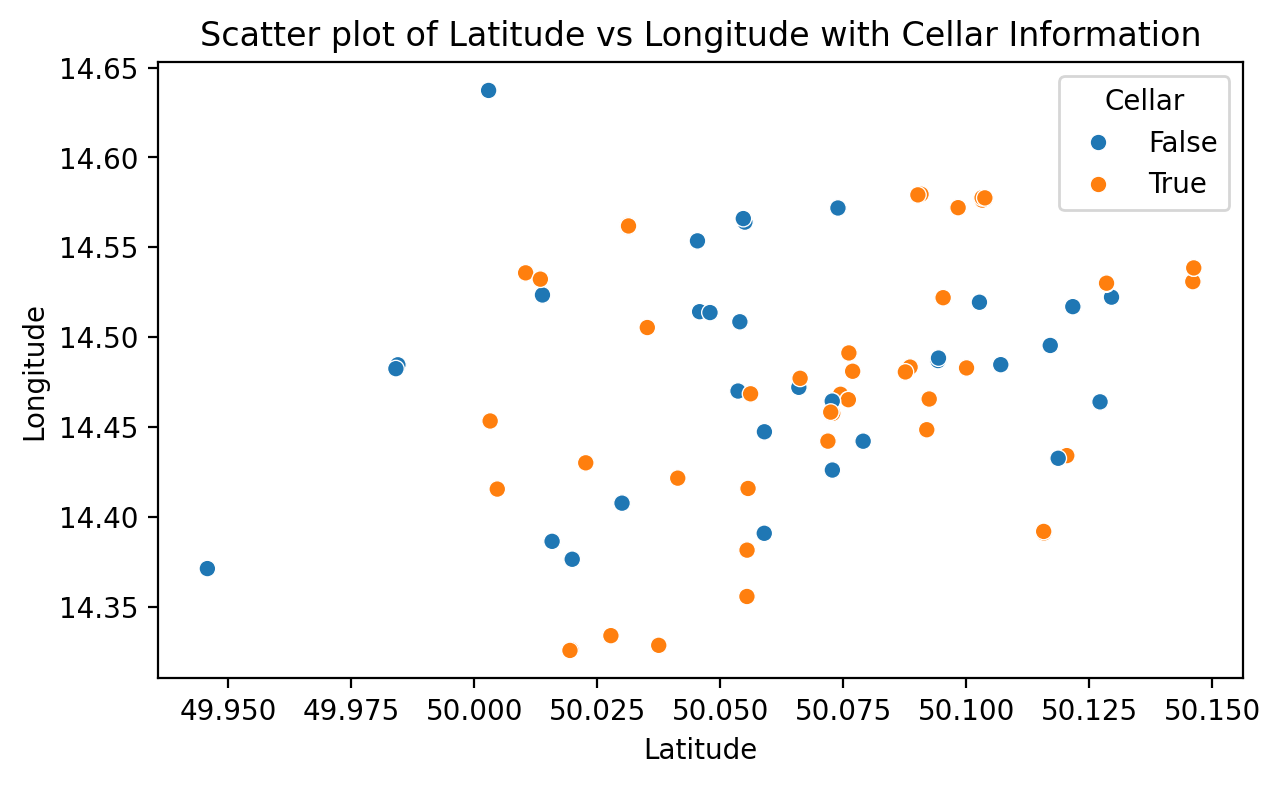

In [65]:
plt.figure(figsize=(7, 4))

sns.scatterplot(x='lat', y='lon', data=df_S, hue='cellar')
plt.title('Scatter plot of Latitude vs Longitude with Cellar Information')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(title='Cellar')
plt.show()

In [66]:
df_S['price_per_m2'] = df_S['price'] / df_S['area1'].astype(int)

Text(0.5, 1.0, 'Price per m² vs Area')

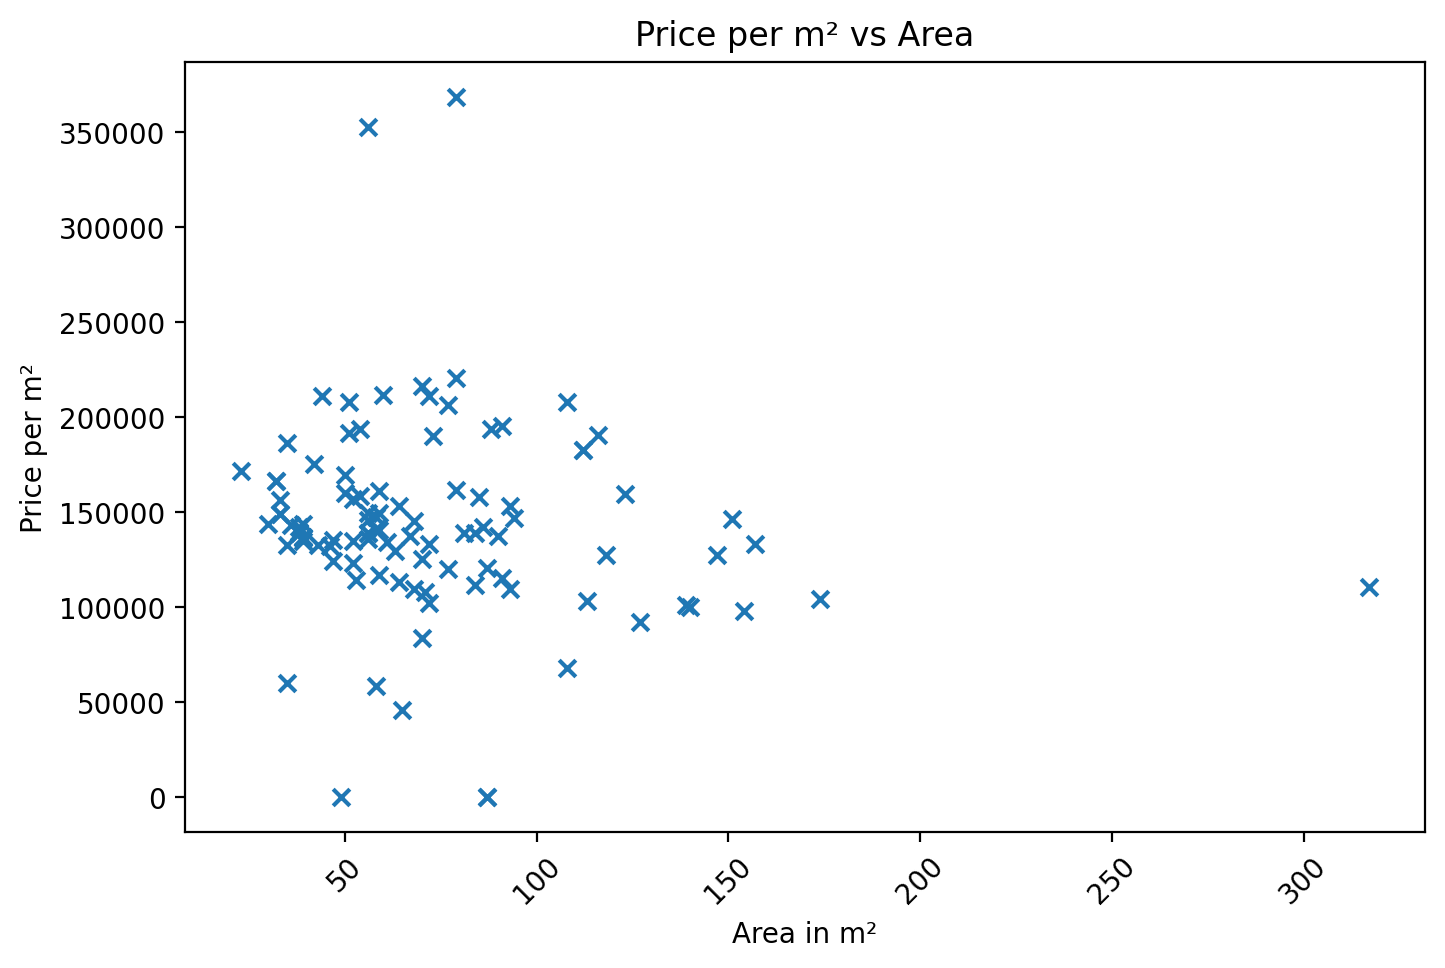

In [67]:
plt.figure(figsize=(8, 5), dpi=100)
plt.scatter(df_S['area2'], df_S['price_per_m2'], marker='x')
plt.ylabel('Price per m²')
plt.xlabel('Area in m²')
plt.xticks(rotation=45)
plt.title('Price per m² vs Area')